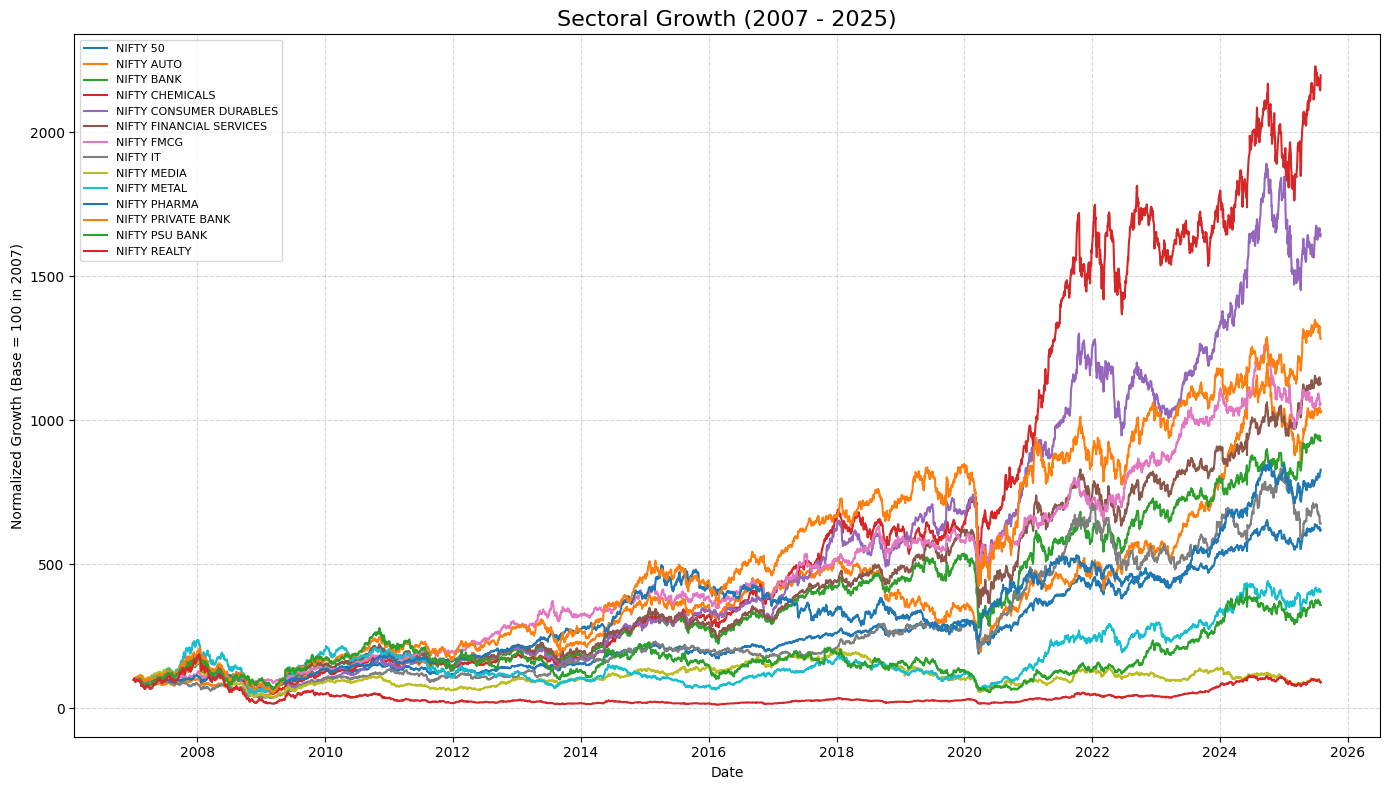


===== SECTORAL GROWTH SUMMARY (January 2007 → July 2025) =====

                  Sector  Start_Close  End_Close    Growth_%
         NIFTY CHEMICALS      1430.71   31448.30 2098.090459
 NIFTY CONSUMER DURABLES      2341.59   38545.50 1546.125069
      NIFTY PRIVATE BANK      2112.75   27119.45 1183.609040
NIFTY FINANCIAL SERVICES      2366.95   26703.50 1028.181837
              NIFTY FMCG      5196.52   55020.40  958.793192
              NIFTY AUTO      2307.29   23745.80  929.164084
              NIFTY BANK      6039.55   56150.70  829.716618
            NIFTY PHARMA      2781.67   23073.90  729.498107
                NIFTY IT      5519.90   35481.70  542.796065
                NIFTY 50      4007.40   24855.05  520.228827
             NIFTY METAL      2309.34    9399.75  307.031879
          NIFTY PSU BANK      1925.74    6907.70  258.703667
             NIFTY MEDIA      1748.85    1624.80   -7.093233
            NIFTY REALTY      1009.67     917.65   -9.113869

✅ Saved summary to 

In [6]:
# === Sectoral Growth Visualization ===
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# === Step 1: Read all CSV files in the folder ===
folder_path = "C:/Users/Shobith/Downloads/archive (1) (1)"   # change if needed
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# === Step 2: Initialize storage ===
growth_summary = []

plt.figure(figsize=(14, 8))

# === Step 3: Process each file ===
for file in csv_files:
    try:
        df = pd.read_csv(file)

        # Normalize column names
        df.columns = [col.strip().lower() for col in df.columns]

        # Identify main columns
        date_col = [c for c in df.columns if "date" in c][0]
        close_col = [c for c in df.columns if "close" in c][0]

        # Clean and filter
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        df = df.dropna(subset=[date_col, close_col])
        df = df[df[date_col].dt.year >= 2007]

        # Sort
        df = df.sort_values(by=date_col)

        # Calculate growth
        start_price = df[close_col].iloc[0]
        end_price = df[close_col].iloc[-1]
        growth_pct = ((end_price - start_price) / start_price) * 100

        # Store results
        sector_name = os.path.basename(file).replace(".csv", "")
        growth_summary.append([sector_name, start_price, end_price, growth_pct])

        # Plot growth curve (normalized to 100)
        df["Normalized Growth"] = (df[close_col] / start_price) * 100
        plt.plot(df[date_col], df["Normalized Growth"], label=sector_name)

    except Exception as e:
        print(f"⚠️ Error processing {file}: {e}")

# === Step 4: Finalize plot ===
plt.title("Sectoral Growth (2007 - 2025)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Normalized Growth (Base = 100 in 2007)")
plt.legend(loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Step 5: Summary Table ===
growth_df = pd.DataFrame(growth_summary, columns=["Sector", "Start_Close", "End_Close", "Growth_%"])
growth_df = growth_df.sort_values(by="Growth_%", ascending=False).reset_index(drop=True)
print("\n===== SECTORAL GROWTH SUMMARY (January 2007 → July 2025) =====\n")
print(growth_df.to_string(index=False))

# Save results
growth_df.to_csv("sectoral_growth_summary.csv", index=False)
print("\n✅ Saved summary to 'sectoral_growth_summary.csv'")

In [1]:
# combined_risk_metrics_plot.py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

# ---- Data (from your supplied rounded table) ----
data = {
    "Sector": [
        "NIFTY 50","NIFTY AUTO","NIFTY BANK","NIFTY CHEMICALS","NIFTY CONSUMER DURABLES",
        "NIFTY FINANCIAL SERVICES","NIFTY FMCG","NIFTY IT","NIFTY MEDIA","NIFTY METAL",
        "NIFTY PHARMA","NIFTY PRIVATE BANK","NIFTY PSU BANK","NIFTY REALTY"
    ],
    "VaR_5": [-0.01888, -0.02177, -0.02637, -0.02078, -0.02210, -0.02525, -0.01724, -0.02320,
              -0.02709, -0.03143, -0.01845, -0.02616, -0.03303, -0.03895],
    "CVaR_5": [-0.03106, -0.03284, -0.04055, -0.03281, -0.03525, -0.03979, -0.02637, -0.03614,
               -0.04140, -0.04720, -0.02759, -0.04196, -0.04678, -0.05846],
    "Max_Drawdown": [-0.59856, -0.62382, -0.68783, -0.70917, -0.80206, -0.69992, -0.35639, -0.65664,
                     -0.79257, -0.78362, -0.53494, -0.74650, -0.79776, -0.93172],
    "Sharpe": [0.61999, 0.72814, 0.62689, 0.98378, 0.84640, 0.68238, 0.85114, 0.57520,
               0.12833, 0.42709, 0.73946, 0.69239, 0.39921, 0.19079]
}

df = pd.DataFrame(data)

# ---- Plot settings ----
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 14,
    "axes.labelsize": 11,
    "legend.fontsize": 9,
    "figure.dpi": 600,
})

out_dir = Path("./plots")
out_dir.mkdir(parents=True, exist_ok=True)
out_file = out_dir / "risk_metrics_combined.png"

# ---- Figure layout ----
n = len(df)
x = np.arange(n)
width = 0.20

fig, ax_left = plt.subplots(figsize=(14, 6))

# Bars: VaR, CVaR, Max Drawdown (all negative)
bars_v = ax_left.bar(x - width, df["VaR_5"], width, label="VaR (5%)", color="#6c99bf", edgecolor="k", linewidth=0.3)
bars_cv = ax_left.bar(x, df["CVaR_5"], width, label="CVaR (5%)", color="#9fb7d8", edgecolor="k", linewidth=0.3)
bars_dd = ax_left.bar(x + width, df["Max_Drawdown"], width, label="Max Drawdown", color="#c7dce6", edgecolor="k", linewidth=0.3)

ax_left.set_ylabel("Loss metrics (negative = drawdown/loss)", fontsize=11)
ax_left.set_xticks(x)
ax_left.set_xticklabels(df["Sector"], rotation=60, ha="right", fontsize=10)
ax_left.set_title("Sector Risk Metrics — VaR, CVaR, Max Drawdown & Sharpe Ratio", fontsize=14, weight="bold")

# Secondary axis for Sharpe ratio
ax_right = ax_left.twinx()
ax_right.plot(x, df["Sharpe"], color="#2f4f4f", marker="o", linestyle="-", linewidth=2, label="Sharpe Ratio")
ax_right.set_ylabel("Sharpe Ratio", fontsize=11)

# Add horizontal zero line
ax_left.axhline(0, color="0.2", linewidth=0.8)

# Legends: combine
bars = [bars_v, bars_cv, bars_dd]
handles_left = [b for b in bars]
labels_left = ["VaR (5%)", "CVaR (5%)", "Max Drawdown"]
handles_right, labels_right = ax_right.get_legend_handles_labels()
first_legend = ax_left.legend(handles=handles_left, labels=labels_left, loc="upper left", frameon=True)
ax_left.add_artist(first_legend)
ax_left.legend(handles_right, labels_right, loc="upper right", frameon=True)

# Annotate values (small, readable)
def annotate_bars(bars, fmt="{:.3f}", va="bottom", offset=3):
    for bar in bars:
        h = bar.get_height()
        ax_left.annotate(fmt.format(h),
                         xy=(bar.get_x() + bar.get_width() / 2, h),
                         xytext=(0, offset if h >= 0 else -10),  # text offset
                         textcoords="offset points",
                         ha="center", va="bottom" if h >= 0 else "top",
                         fontsize=8, rotation=0)

annotate_bars(bars_v, fmt="{:.5f}")
annotate_bars(bars_cv, fmt="{:.5f}")
annotate_bars(bars_dd, fmt="{:.2f}")

# Annotate Sharpe values
for i, s in enumerate(df["Sharpe"]):
    ax_right.annotate(f"{s:.3f}", xy=(x[i], s), xytext=(0, 6), textcoords="offset points",
                      ha="center", fontsize=8, color="#2f4f4f")

plt.tight_layout()
fig.savefig(out_file, dpi=600, bbox_inches="tight")
plt.close(fig)

print(f"Saved combined risk metrics figure to: {out_file}")


Saved combined risk metrics figure to: plots\risk_metrics_combined.png


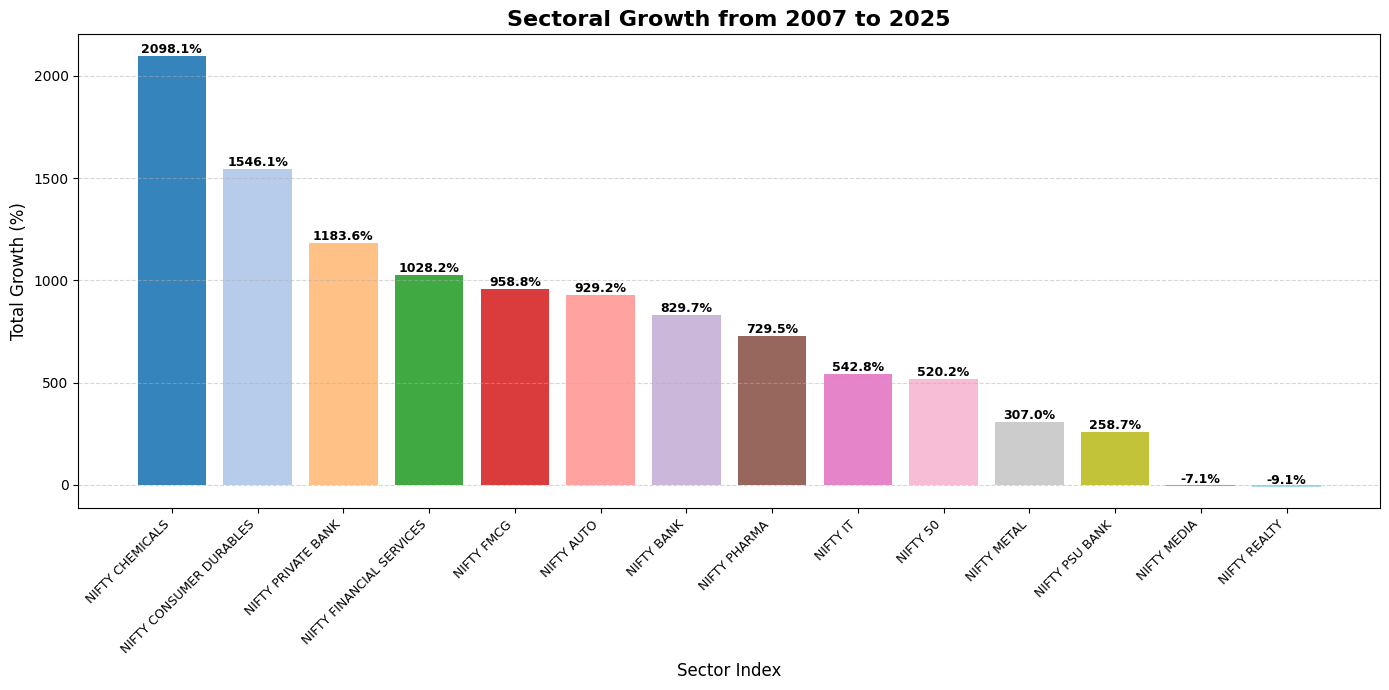

✅ Saved results to 'vibrant_sectoral_growth_summary.csv'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# === Step 1: Read all sector CSVs ===
folder_path = "C:/Users/Shobith/Downloads/archive (1) (1)"   # change if needed
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

growth_summary = []

# === Step 2: Calculate growth ===
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df.columns = [c.strip().lower() for c in df.columns]

        date_col = [c for c in df.columns if "date" in c][0]
        close_col = [c for c in df.columns if "close" in c][0]

        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
        df = df.dropna(subset=[date_col, close_col])
        df = df[df[date_col].dt.year >= 2007]
        df = df.sort_values(by=date_col)

        start_price = df[close_col].iloc[0]
        end_price = df[close_col].iloc[-1]
        growth_pct = ((end_price - start_price) / start_price) * 100

        sector_name = os.path.basename(file).replace(".csv", "")
        growth_summary.append([sector_name, growth_pct])

    except Exception as e:
        print(f"⚠️ Error processing {file}: {e}")

# === Step 3: Create DataFrame ===
growth_df = pd.DataFrame(growth_summary, columns=["Sector", "Growth_%"])
growth_df = growth_df.sort_values(by="Growth_%", ascending=False).reset_index(drop=True)

# === Step 4: Vibrant Color Palette ===
# Using matplotlib's 'tab20', 'hsv', and 'rainbow' mixed for rich vibrancy
colors = plt.cm.tab20(np.linspace(0, 1, len(growth_df)))
if len(growth_df) > 20:  # fallback for >20 sectors
    colors = plt.cm.hsv(np.linspace(0, 1, len(growth_df)))

# === Step 5: Bar Plot ===
plt.figure(figsize=(14, 7))
bars = plt.bar(growth_df["Sector"], growth_df["Growth_%"], color=colors, alpha=0.9)

plt.title("Sectoral Growth from 2007 to 2025", fontsize=16, fontweight='bold')
plt.xlabel("Sector Index", fontsize=12)
plt.ylabel("Total Growth (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add percentage labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# === Step 6: Save growth summary ===
growth_df.to_csv("vibrant_sectoral_growth_summary.csv", index=False)
print("✅ Saved results to 'vibrant_sectoral_growth_summary.csv'")


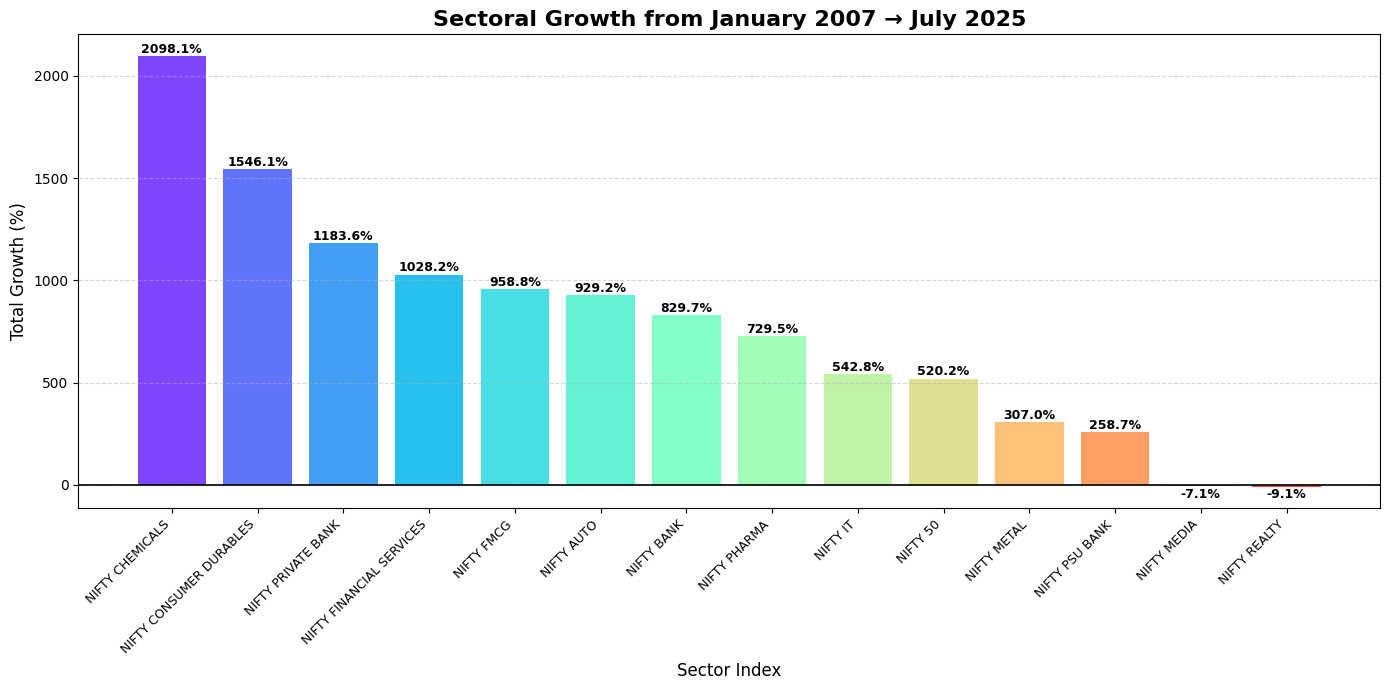

✅ Saved summary to 'bright_vibrant_sectoral_growth_summary.csv'


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# === Step 1: Read all sector CSVs ===
folder_path = "C:/Users/Shobith/Downloads/archive (1) (1)"   # change if needed
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

growth_summary = []

# === Step 2: Calculate growth for each file ===
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df.columns = [c.strip().lower() for c in df.columns]

        date_col = [c for c in df.columns if "date" in c][0]
        close_col = [c for c in df.columns if "close" in c][0]

        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
        df = df.dropna(subset=[date_col, close_col])
        df = df[df[date_col].dt.year >= 2007]
        df = df.sort_values(by=date_col)

        start_price = df[close_col].iloc[0]
        end_price = df[close_col].iloc[-1]
        growth_pct = ((end_price - start_price) / start_price) * 100

        sector_name = os.path.basename(file).replace(".csv", "")
        growth_summary.append([sector_name, growth_pct])

    except Exception as e:
        print(f"⚠️ Error processing {file}: {e}")

# === Step 3: Create DataFrame ===
growth_df = pd.DataFrame(growth_summary, columns=["Sector", "Growth_%"])
growth_df = growth_df.sort_values(by="Growth_%", ascending=False).reset_index(drop=True)

# === Step 4: Bright vibrant color palette ===
# hsv and rainbow generate bright hues (not dark)
colors = plt.cm.rainbow(np.linspace(0.05, 0.95, len(growth_df)))

# === Step 5: Create the Bar Plot ===
plt.figure(figsize=(14, 7))
bars = plt.bar(growth_df["Sector"], growth_df["Growth_%"], color=colors, alpha=0.85)

plt.title("Sectoral Growth from January 2007 → July 2025", fontsize=16, fontweight='bold')
plt.xlabel("Sector Index", fontsize=12)
plt.ylabel("Total Growth (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.axhline(0, color="black", linewidth=1.2)  # x-axis for separating gains/losses
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    label_y = height if height >= 0 else height - 5  # if negative, move label below bar
    plt.text(bar.get_x() + bar.get_width()/2, label_y + (1 if height >= 0 else -1),
             f"{height:.1f}%", ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# === Step 6: Save the summary ===
growth_df.to_csv("bright_vibrant_sectoral_growth_summary.csv", index=False)
print("✅ Saved summary to 'bright_vibrant_sectoral_growth_summary.csv'")
